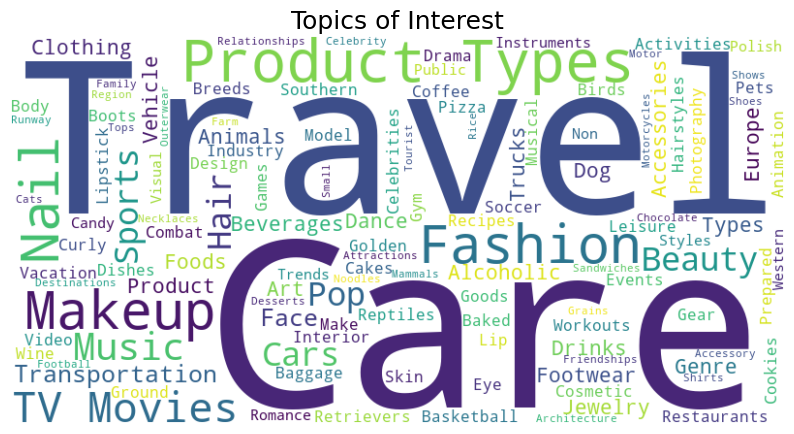

In [91]:
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

with open('./originalFiles/your_topics.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

topics_list = []

for topic in data.get("topics_your_topics", []):
    name_data = topic.get("string_map_data", {}).get("Name", {})
    if "value" in name_data:
        topics_list.append(name_data["value"])

# Creating a word cloud using the list of topics
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(" ".join(topics_list))

# Display the word cloud
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.subplots_adjust(top = 0.85)
plt.title("Topics of Interest", fontsize = 18)
plt.show()

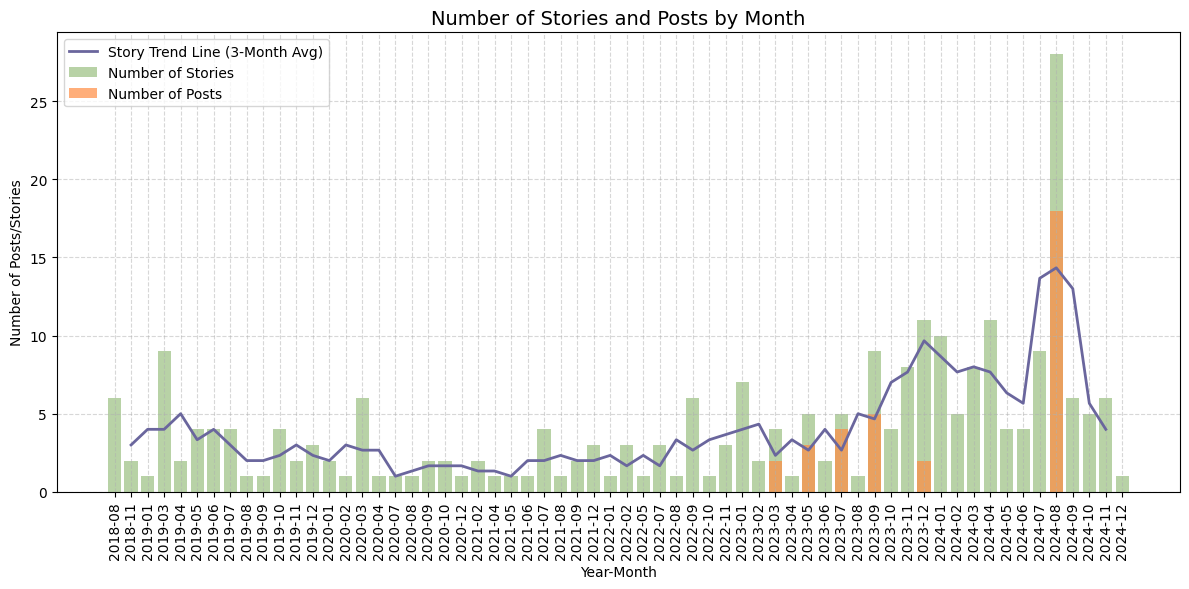

In [92]:
import json
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

with open("./securedFiles/secured_stories.json", "r", encoding="utf-8") as file:
    stories_data = json.load(file)

with open("./securedFiles/secured_posts.json", "r", encoding="utf-8") as file:
    posts_data = json.load(file)

story_timestamps = [story.get("creation_timestamp") for story in stories_data.get("ig_stories", [])]

post_timestamps = [
    media.get("creation_timestamp") for post in posts_data for media in post.get("media", [])
]

if not story_timestamps or not post_timestamps:
    print("No timestamps found in the JSON files.")
else:
    story_dates = pd.to_datetime(story_timestamps, unit="s")
    post_dates = pd.to_datetime(post_timestamps, unit="s")

    df_stories = pd.DataFrame({"Date": story_dates})
    df_stories["YearMonth"] = df_stories["Date"].dt.to_period("M")

    df_posts = pd.DataFrame({"Date": post_dates})
    df_posts["YearMonth"] = df_posts["Date"].dt.to_period("M")

    story_counts = df_stories["YearMonth"].value_counts().sort_index()
    post_counts = df_posts["YearMonth"].value_counts().sort_index()

    # Calculating a 3-point moving average for smooth trend lines
    story_rolling_avg = story_counts.rolling(window=3, center=True).mean()
    post_rolling_avg = post_counts.rolling(window=3, center=True).mean()

    plt.figure(figsize=(12, 6))

    plt.bar(story_counts.index.astype(str), story_counts.values, color="#9ABF80", label="Number of Stories", alpha=0.7)
    plt.bar(post_counts.index.astype(str), post_counts.values, color="#FF8C42", label="Number of Posts", alpha=0.7)

    plt.plot(story_counts.index.astype(str), story_rolling_avg, color="#6A669D", label="Story Trend Line (3-Month Avg)", linewidth=2)

    # Customizing the chart
    plt.title("Number of Stories and Posts by Month", fontsize=14)
    plt.xlabel("Year-Month", fontsize=10)
    plt.ylabel("Number of Posts/Stories", fontsize=10)
    plt.xticks(rotation=90, fontsize=10)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()

    plt.show()

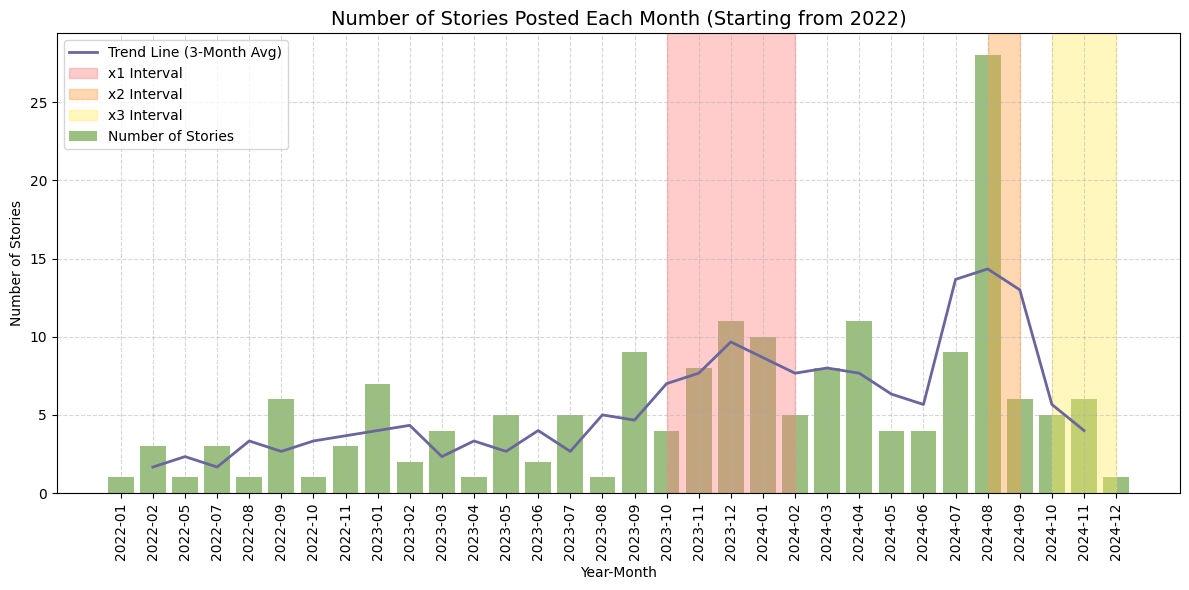

In [93]:
import json
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

with open("./securedFiles/secured_stories.json", "r", encoding="utf-8") as file:
    stories_data = json.load(file)

timestamps = [
    story.get("creation_timestamp") for story in stories_data.get("ig_stories", [])
]

if not timestamps:
    print("No timestamps found in the JSON file.")
else:
    story_dates = pd.to_datetime(timestamps, unit="s")

    df_stories = pd.DataFrame({"Date": story_dates})
    df_stories["YearMonth"] = df_stories["Date"].dt.to_period("M")

    # Filtering data to start from January 2022
    df_stories = df_stories[df_stories["Date"] >= "2022-01-01"]

    story_counts = df_stories["YearMonth"].value_counts().sort_index()

    rolling_avg = story_counts.rolling(window=3, center=True).mean()


    x1_start = pd.to_datetime("2023-10-01").to_period("M")
    x1_end = pd.to_datetime("2024-02-29").to_period("M")

    x2_start = pd.to_datetime("2024-08-01").to_period("M")
    x2_end = pd.to_datetime("2024-09-30").to_period("M")

    x3_start = pd.to_datetime("2024-10-01").to_period("M")
    x3_end = pd.to_datetime("2024-12-31").to_period("M")

    plt.figure(figsize=(12, 6))

    plt.bar(story_counts.index.astype(str), story_counts.values, color="#9ABF80", label="Number of Stories")

    plt.plot(story_counts.index.astype(str), rolling_avg, color="#6A669D", label="Trend Line (3-Month Avg)", linewidth=2)

    # Highlighting the x1, x2, and x3 intervals with different colors
    plt.axvspan(str(x1_start), str(x1_end), color="#FF7F7F", alpha=0.4, label="x1 Interval")
    plt.axvspan(str(x2_start), str(x2_end), color="#FF9F3D", alpha=0.4, label="x2 Interval")
    plt.axvspan(str(x3_start), str(x3_end), color="#FFEB5C", alpha=0.4, label="x3 Interval")

    # Customizing the chart
    plt.title("Number of Stories Posted Each Month (Starting from 2022)", fontsize=14)
    plt.xlabel("Year-Month", fontsize=10)
    plt.ylabel("Number of Stories", fontsize=10)
    plt.xticks(rotation=90, fontsize=10)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()

    plt.show()

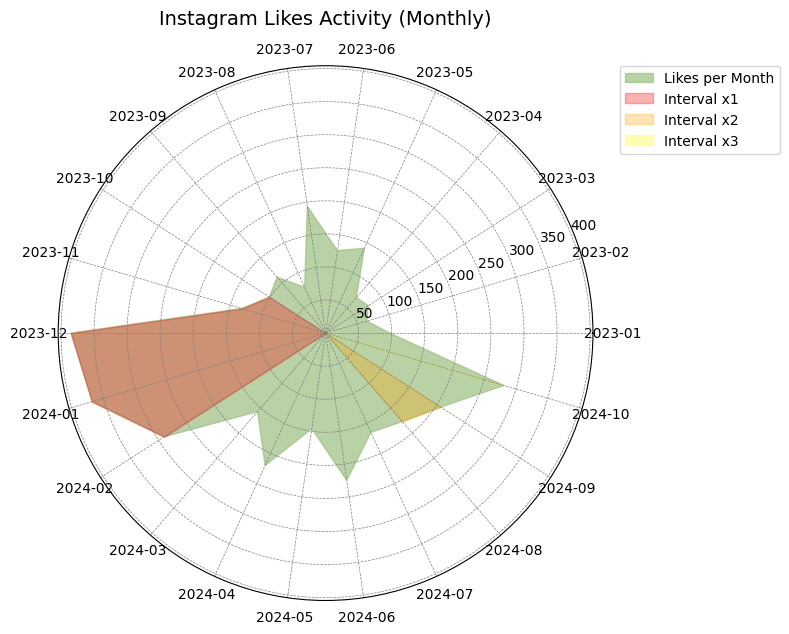

In [94]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import MaxNLocator

with open('./originalFiles/liked_posts.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

timestamps = []
for post in data.get("likes_media_likes", []):
    for like in post.get("string_list_data", []):
        timestamps.append(like.get("timestamp"))

dates = pd.to_datetime(timestamps, unit='s')

df_likes = pd.DataFrame({'Date': dates})
df_likes = df_likes[df_likes['Date'] >= '2023-01-01']
df_likes['Month'] = df_likes['Date'].dt.month
df_likes['YearMonth'] = df_likes['Date'].dt.to_period('M')

monthly_likes = df_likes.groupby('YearMonth').size()

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Angling for each month (12 months, so 360 degrees / 12 = 30 degrees per month)
angles = np.linspace(0, 2 * np.pi, len(monthly_likes), endpoint=False)

ax.fill(angles, monthly_likes, color='#9ABF80', alpha=0.7, label='Likes per Month')

x1_start = pd.to_datetime("2023-10-01").to_period("M")
x1_end = pd.to_datetime("2024-02-29").to_period("M")

x2_start = pd.to_datetime("2024-08-01").to_period("M")
x2_end = pd.to_datetime("2024-09-30").to_period("M")

x3_start = pd.to_datetime("2024-10-01").to_period("M")
x3_end = pd.to_datetime("2024-12-31").to_period("M")

month_labels = [pd.to_datetime(str(month)).to_period('M') for month in monthly_likes.index]

x1_months = [i for i, month in enumerate(month_labels) if x1_start <= month <= x1_end]
x2_months = [i for i, month in enumerate(month_labels) if x2_start <= month <= x2_end]
x3_months = [i for i, month in enumerate(month_labels) if x3_start <= month <= x3_end]

ax.fill_between(angles[x1_months], 0, monthly_likes.iloc[x1_months], color='red', alpha=0.3, label='Interval x1')
ax.fill_between(angles[x2_months], 0, monthly_likes.iloc[x2_months], color='orange', alpha=0.3, label='Interval x2')
ax.fill_between(angles[x3_months], 0, monthly_likes.iloc[x3_months], color='yellow', alpha=0.3, label='Interval x3')

ax.legend(loc='upper left', fontsize=10, bbox_to_anchor=(1.05, 1), borderaxespad=0.)

ax.set_xticks(angles)
ax.set_xticklabels([str(month) for month in monthly_likes.index], fontsize=10)

ax.set_rmin(0)
ax.minorticks_on()
ax.set_rticks(np.linspace(0, max(monthly_likes), 5), minor=True)  # Minor ticks for weeks (can be adjusted)
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

ax.set_title("Instagram Likes Activity (Monthly)", fontsize=14, color='black', pad=30)

plt.tight_layout()
plt.show()


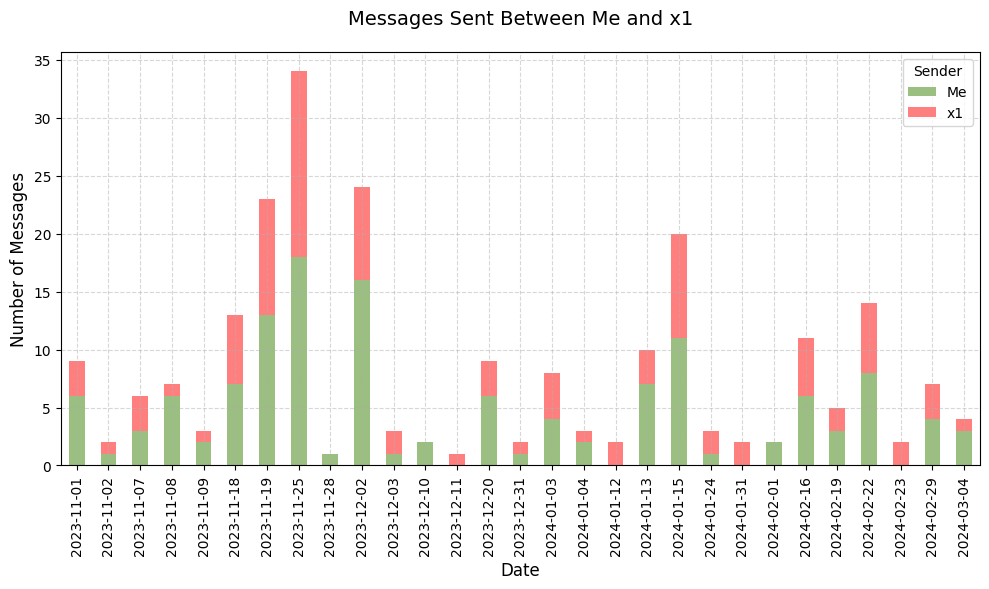

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import json

with open('./securedFiles/secured_x1_messages.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

messages = data['messages']
df = pd.DataFrame(messages)

df['timestamp'] = pd.to_datetime(df['timestamp_ms'], unit='ms')

df['sender'] = df['sender_name'].apply(lambda x: 'Me' if x == 'simaykarakis' else 'x1')

df['date'] = df['timestamp'].dt.date

message_counts = df.groupby(['date', 'sender']).size().unstack(fill_value=0)

ax = message_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#9ABF80', '#FF7F7F'])

plt.title("Messages Sent Between Me and x1", fontsize=14, pad=20)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=90)
plt.legend(title="Sender", fontsize=10)
plt.tight_layout()

plt.show()

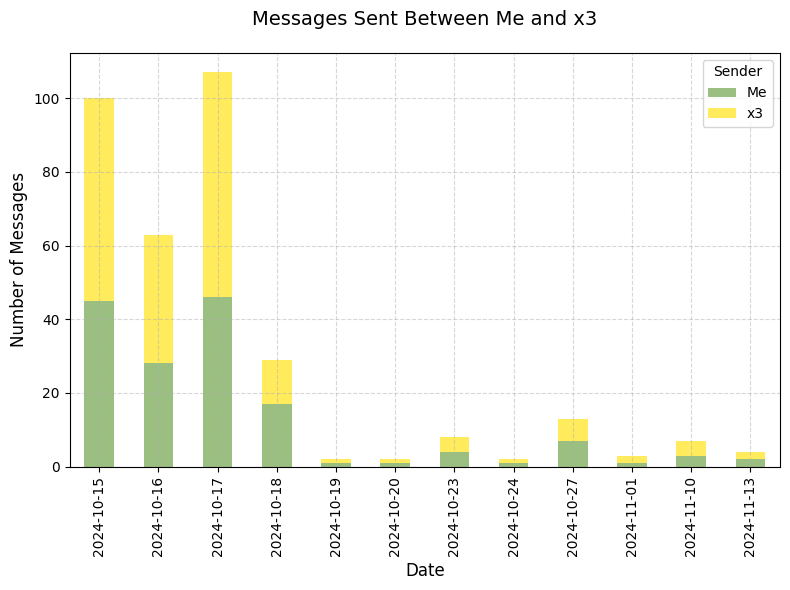

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import json

with open('./securedFiles/secured_x3_messages.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

messages = data['messages']
df = pd.DataFrame(messages)

df['timestamp'] = pd.to_datetime(df['timestamp_ms'], unit='ms')

df['sender'] = df['sender_name'].apply(lambda x: 'Me' if x == 'simaykarakis' else 'x3')

df['date'] = df['timestamp'].dt.date

message_counts = df.groupby(['date', 'sender']).size().unstack(fill_value=0)

ax = message_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#9ABF80', '#FFEB5C'])

plt.title("Messages Sent Between Me and x3", fontsize=14, pad=20)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=90)
plt.legend(title="Sender", fontsize=10)
plt.tight_layout()

plt.show()